In [1]:
cat Dockerfile

# Pull model image
FROM ewatercycle/pcr-globwb_model:latest
MAINTAINER Gijs van den Oord <g.vandenoord@esciencecenter.nl>

# Install grpc4bmi
RUN pip install grpc4bmi

# Set environment
WORKDIR /opt
ENV BMI_MODULE=bmiPcrglobwb
ENV BMI_CLASS=BmiPCRGlobWB
ENV BMI_PORT=55555
ENTRYPOINT ["run-bmi-server","--path","/opt/PCR-GLOBWB_model/model"]
EXPOSE 55555


In [1]:
import docker
client = docker.from_env()

In [2]:
client.images.list(name="pcrg*")

[<Image: 'ewatercycle/pcrg-grpc4bmi:latest'>]

In [1]:
ls data/RhineMeuse30min

cloneMaps/    ini_and_batch_files/  landSurface/
forcing/      initialConditions/    pcrg_rhinemeuse.ini
groundwater/  landCover/            routing/


In [1]:
from grpc4bmi.bmi_client_docker import BmiClientDocker
pcrg = BmiClientDocker(image="ewatercycle/pcrg-grpc4bmi:latest", image_port=55555, 
                        input_dir="./data/RhineMeuse30min", 
                        output_dir="./output")

In [2]:
pcrg.get_component_name()

'pcrglobwb'

In [3]:
pcrg.initialize("pcrg_rhinemeuse.ini")

In [4]:
pcrg.get_input_var_names()

('top_layer_soil_saturation',)

In [5]:
pcrg.get_output_var_names()

('top_layer_soil_saturation',)

In [6]:
tstart = pcrg.get_start_time()
tstep = pcrg.get_time_step()
print(tstart)

36525.0


In [7]:
%time pcrg.update_until(tstart + 100 * tstep)
print(pcrg.get_current_time())

CPU times: user 1.65 ms, sys: 4.62 ms, total: 6.26 ms
Wall time: 26.8 s
36625.0


In [8]:
variable = "discharge"
vals = pcrg.get_value(variable)
unit = pcrg.get_var_units(variable)
shape = pcrg.get_grid_shape(pcrg.get_var_grid(variable))

[]

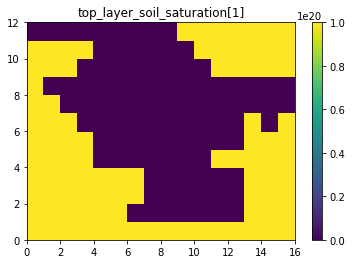

In [10]:
import matplotlib.pyplot as plt
import numpy
import numpy.ma as ma
missval = -999.
X, Y = numpy.arange(shape[1]), numpy.arange(shape[0])
Z = ma.masked_where(vals == missval, vals)
plt.title(variable + '[' + unit + ']')
plt.pcolormesh(X,Y,Z)
plt.colorbar()
plt.plot()

In [11]:
del pcrg